In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Titanic dataset
data = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")

# Explore the dataset
print(data.head())


   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  


In [ ]:
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Sex']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target variable
X = data[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81       111
           1       0.69      0.67      0.68        67

    accuracy                           0.76       178
   macro avg       0.75      0.75      0.75       178
weighted avg       0.76      0.76      0.76       178



In [ ]:
# Example passenger data (modify as needed)
example_passenger = np.array([3, 1, 25, 1, 0, 7.25]).reshape(1, -1)

# Predict if the example passenger survived
prediction = clf.predict(example_passenger)[0]

if prediction == 1:
    print("The passenger is predicted to have survived.")
else:
    print("The passenger is predicted to have not survived.")


The passenger is predicted to have not survived.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import seaborn as sns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    int64  
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.6+ KB
None


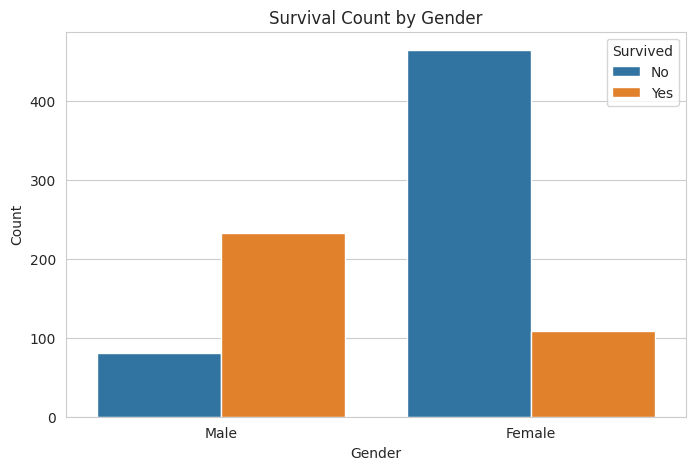

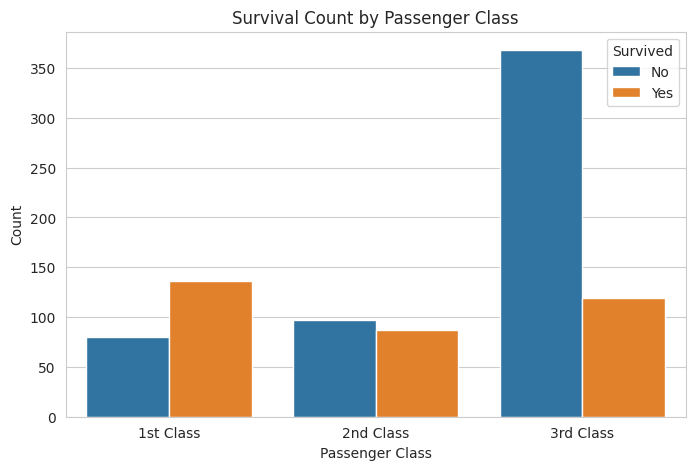

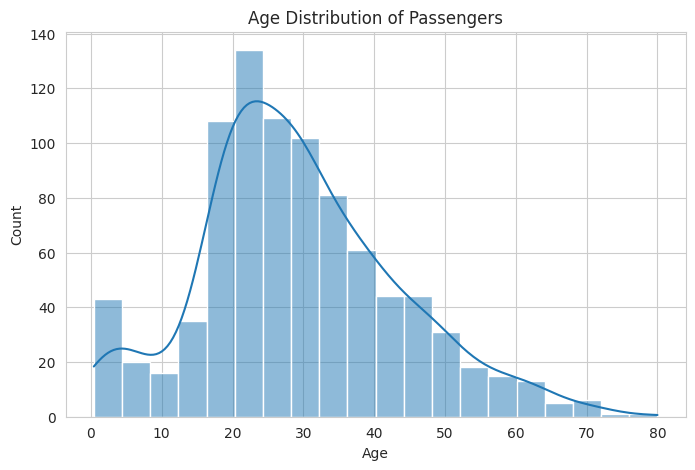

In [ ]:
# Explore the dataset
print(data.info())

# Visualize survival distribution by gender
sns.set_style('whitegrid')
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Visualize survival distribution by passenger class
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Visualize age distribution of passengers
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
